# 1. EDA 

In [11]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxopt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def highly_corr(df,rate):
    cor_matrix = df.corr().abs()
    upper_tri=cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)) 
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= rate)]
    return to_drop

def plot_prediction(y, y_pred):
    print('accuracy :',accuracy_score(y, y_pred))
    print('precision :',precision_score(y, y_pred))
    print('recall :',recall_score(y, y_pred))
    print('f1 :',f1_score(y, y_pred))
    print(classification_report(y, y_pred))
    cm = confusion_matrix(y, y_pred)
    cmp = ConfusionMatrixDisplay(cm, display_labels=['Bad', 'Good'])
    cmp.plot()

sc =StandardScaler()
mx = MinMaxScaler()

# Explore Dataset

In [12]:
# Importing the dataset
dataset_path = r'../data/creditdata/Credit_informations.xlsx'
df = pd.read_excel(dataset_path)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,total_rev_hi_lim,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d,good_bad
0,5000,5000,4975.0,1,10.65,162.87,2.2,1,24000.0,1,...,1,1,1,1,0,5000,10,395,72,1
1,2500,2500,2500.0,2,15.27,59.83,3.6,1,30000.0,2,...,2,2,1,1,0,2500,0,224,72,0
2,2400,2400,2400.0,1,15.96,84.33,3.8,1,12252.0,3,...,3,1,1,1,0,2400,10,193,72,1
3,10000,10000,10000.0,1,13.49,339.31,3.0,1,49200.0,2,...,4,3,1,1,0,10000,10,262,72,1
4,3000,3000,3000.0,2,12.69,67.79,2.8,1,80000.0,2,...,5,1,1,1,0,3000,1,263,72,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461097 entries, 0 to 461096
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    461097 non-null  int64  
 1   funded_amnt                  461097 non-null  int64  
 2   funded_amnt_inv              461097 non-null  float64
 3   term                         461097 non-null  int64  
 4   int_rate                     461097 non-null  float64
 5   installment                  461097 non-null  float64
 6   grade                        461097 non-null  float64
 7   home_ownership               461097 non-null  int64  
 8   annual_inc                   461097 non-null  float64
 9   verification_status          461097 non-null  int64  
 10  issue_d                      461097 non-null  int64  
 11  loan_status                  461097 non-null  int64  
 12  pymnt_plan                   461097 non-null  int64  
 13 

In [14]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,total_rev_hi_lim,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d,good_bad
count,461097.000000,461097.000000,4.610970e+05,461097.000000,461097.00000,461097.000000,461097.000000,461097.000000,4.610970e+05,461097.000000,...,461097.000000,461097.000000,461097.0,461097.0,461097.000000,4.610970e+05,461097.000000,461097.000000,461097.000000,461097.000000
mean,14319.835306,14295.666584,5.233687e+07,1.275441,13.83601,432.143229,3.214507,2.103234,7.327271e+04,1.957948,...,75599.930897,7.515963,1.0,1.0,0.004036,2.764782e+04,5.727591,242.297063,51.078669,0.891053
std,8286.815640,8275.219219,5.512425e+08,0.446737,4.35723,243.419489,1.305103,0.949568,5.503467e+04,0.822012,...,55128.026177,12.974241,0.0,0.0,0.068940,3.518802e+04,3.756484,86.516126,14.218972,0.311573
min,500.000000,500.000000,0.000000e+00,1.000000,5.42000,15.670000,1.000000,1.000000,2.000000e+03,1.000000,...,1.000000,1.000000,1.0,1.0,0.000000,1.000000e+02,0.000000,73.000000,36.000000,0.000000
25%,8000.000000,8000.000000,8.000000e+03,1.000000,10.99000,256.890000,2.200000,1.000000,4.500000e+04,1.000000,...,31564.000000,1.000000,1.0,1.0,0.000000,1.165000e+04,2.000000,183.000000,41.000000,1.000000
50%,12000.000000,12000.000000,1.225000e+04,1.000000,13.66000,379.860000,3.000000,3.000000,6.300000e+04,2.000000,...,61126.000000,1.000000,1.0,1.0,0.000000,2.020000e+04,6.000000,225.000000,47.000000,1.000000
75%,20000.000000,20000.000000,2.000000e+04,2.000000,16.49000,566.660000,4.000000,3.000000,8.880000e+04,3.000000,...,126229.000000,8.000000,1.0,1.0,0.000000,3.470000e+04,10.000000,285.000000,56.000000,1.000000
max,35000.000000,35000.000000,9.999709e+09,2.000000,26.06000,1409.990000,7.800000,6.000000,7.500000e+06,3.000000,...,195745.000000,104.000000,1.0,1.0,5.000000,9.999999e+06,10.000000,587.000000,126.000000,1.000000


# Check Non-Values

In [15]:
sum_na = df.isna().sum()
sum_null = df.isnull().sum()
missing_data = pd.concat([sum_na, sum_null], axis=1, keys = ['Total NA', 'Total Null'])
missing_data.reset_index()

,index,Total NA,Total Null
0,loan_amnt,0,0
1,funded_amnt,0,0
2,funded_amnt_inv,0,0
3,term,0,0
4,int_rate,0,0
5,installment,0,0
6,grade,0,0
7,home_ownership,0,0
8,annual_inc,0,0
9,verification_status,0,0


# Visualization

In [16]:
df['good_bad'].value_counts()

1    410862
0     50235
Name: good_bad, dtype: int64

Good "1" : 410862
Bad  "0" : 50235


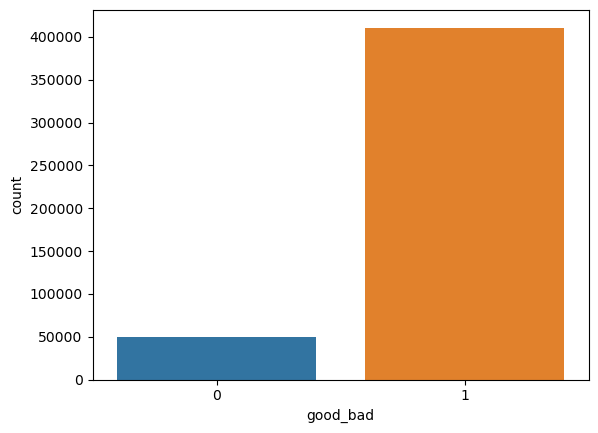

In [8]:
sns.countplot(x = df['good_bad'])

count = df['good_bad'].value_counts()

print('Good "1" :', count[1])
print('Bad  "0" :', count[0])

### 2. Density

/var/folders/gq/3rtsgkd97h7djl6gyntg3f3r0000gn/T/ipykernel_14854/4289271219.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(good[col], label="Good", color='green', fill=True)
/var/folders/gq/3rtsgkd97h7djl6gyntg3f3r0000gn/T/ipykernel_14854/4289271219.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(good[col], label="Good", color='green', fill=True)
/var/folders/gq/3rtsgkd97h7djl6gyntg3f3r0000gn/T/ipykernel_14854/4289271219.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(good[col], label="Good", color='green', fill=True)
/var/folders/gq/3rtsgkd97h7djl6gyntg3f3r0000gn/T/ipykernel_14854/4289271219.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kde

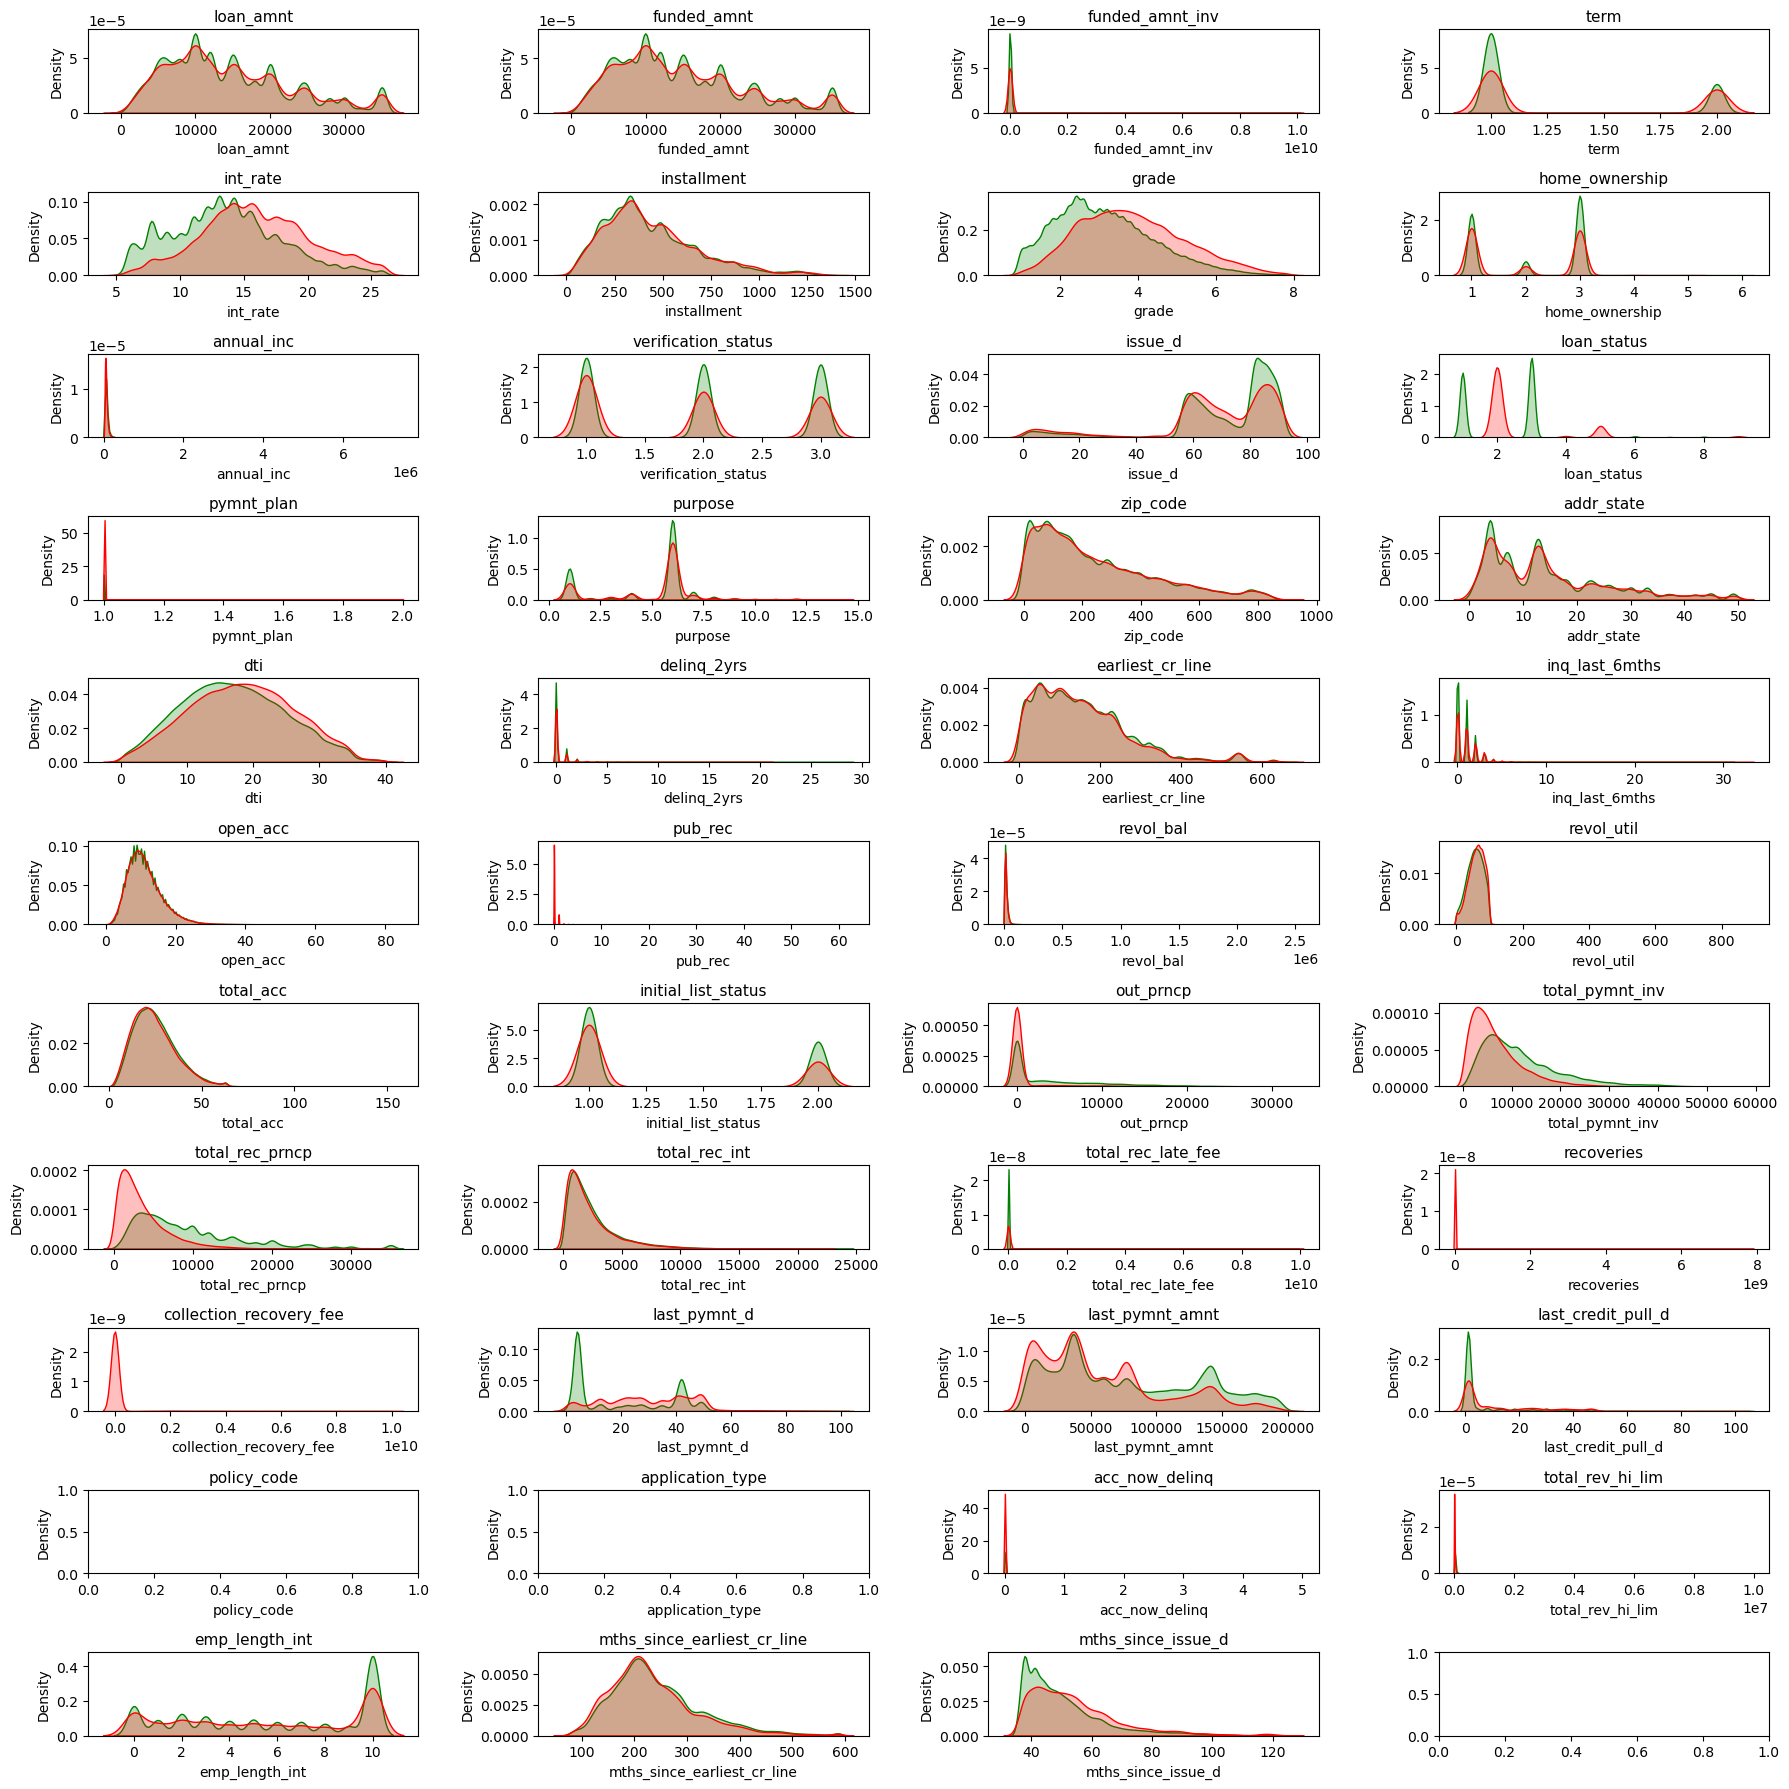

In [152]:
cols_names = df.iloc[:,:-1].columns
idx = 0

# Spliting classes
good = df[df['good_bad']==1]
bad = df[df['good_bad']==0]

# figure plot  
fig, ax = plt.subplots(nrows=11, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

for col in cols_names:
    idx += 1
    plt.subplot(11, 4, idx)
    sns.kdeplot(good[col], label="Good", color='green', fill=True)
    sns.kdeplot(bad[col], label="Bad", color='red', fill=True)
    plt.title(col, fontsize = 11)
    plt.tight_layout()
    

### 3. Correlation matrix

<AxesSubplot: >

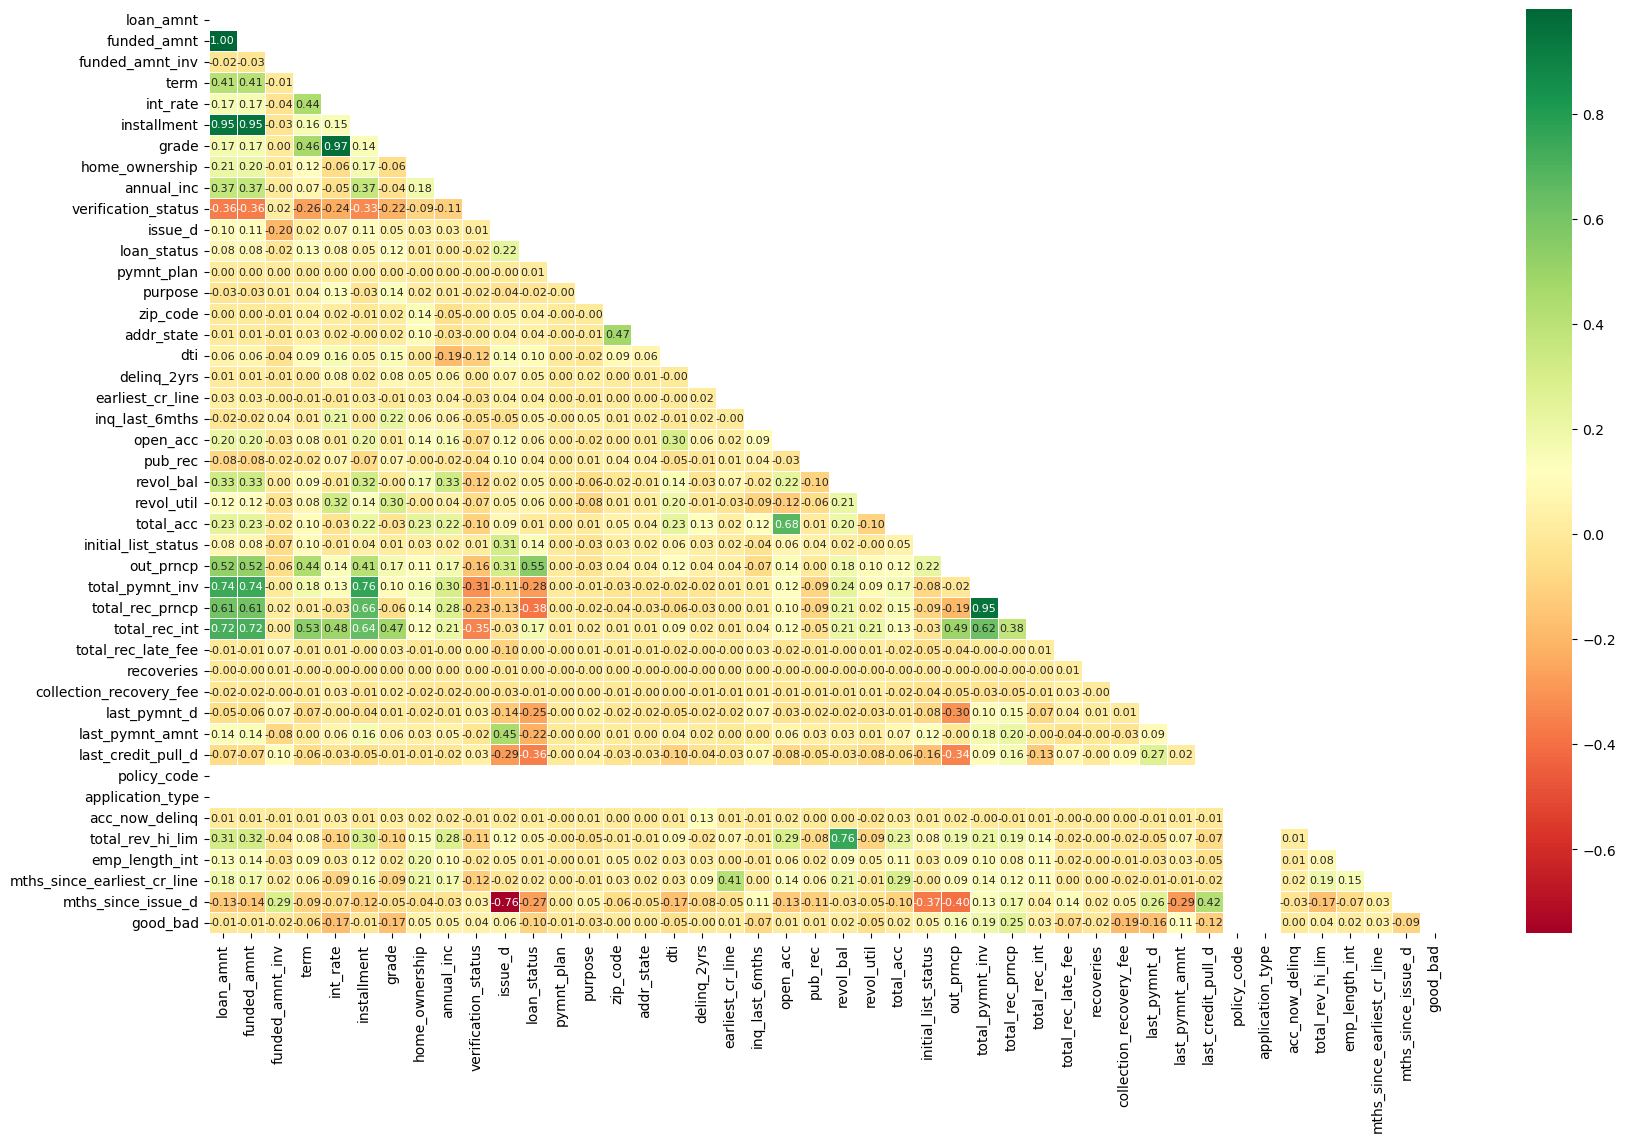

In [9]:
plt.figure(figsize=(20,12))
mask = np.triu(df.corr())
sns.heatmap(df.corr(), mask=mask, annot=True, fmt=".2f", cmap='RdYlGn',linewidths=.5, annot_kws={'fontsize':8})

# Feature Selection

## Cleansing
- grade, sub-grade: same with int_rate
- Drop: 
    -  “zip_code”, “addr_states”,  “issue_d”, “last_credit_pull_d”,"mths_since_earliest_cr_line": not relevant
    - "application_type", "policy_code": only one value as default (1)
    - pymnt_plan: the ratio between 2 values [1,2] very low: 1: 461089 ~ 2: 8
    - 'funded_amnt', 'installment', 'grade', 'total_rec_prncp': highly correlated.

In [17]:
print('Features which are highly correlated: ',highly_corr(df, 0.8))

Features which are highly correlated:  ['funded_amnt', 'installment', 'grade', 'total_rec_prncp']


/var/folders/gq/3rtsgkd97h7djl6gyntg3f3r0000gn/T/ipykernel_44257/213109331.py:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri=cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [18]:
print('Before dropping: ',df.shape)
df.drop(["issue_d", "zip_code","addr_state","last_credit_pull_d","policy_code","mths_since_earliest_cr_line","application_type", "pymnt_plan", 'funded_amnt', 'installment', 'grade', 'total_rec_prncp'], axis=1, inplace=True)
print('After dropping: ', df.shape)

Before dropping:  (461097, 44)
After dropping:  (461097, 32)


# 2. Models

## Model 1: Support Vector Machine

### 1. Split Train, Test datasets

In [30]:
X = df.iloc[:,:-1]
Y = df.iloc[:,df.shape[1]-1]
X_sample_0 = X[Y==0].iloc[:5000,:]
X_sample_1 = X[Y==1].iloc[:5000,:]
Y_sample = np.concatenate((np.zeros((5000,1)), np.ones((5000,1))),0)
X_sample = np.concatenate((X_sample_0, X_sample_1),0)

X_TRAIN,X_test,y_train, y_test = train_test_split(X_sample,Y_sample, test_size= 0.2,random_state = 999)

### 2. Scale Data

In [272]:
X_TRAIN[:,:] = sc.fit_transform(X_TRAIN[:,:])
X_test[:,:] = sc.transform(X_test[:,:])

X_train,X_val,y_train, y_val = train_test_split(X_TRAIN, y_train, test_size= 0.2,random_state = 999)

In [55]:
# Labeling
y_train[y_train==0] = -1
y_val[y_val==0] = -1
y_test[y_test==0] = -1
y_test_svm = y_test

### 3. Training

In [56]:
# Build some functions

m = X_train.shape[0]
n = X_train.shape[1]

def cvxopt_solve_qp(Q, c, A=None, b=None, E=None, d=None):
    Q = .5 * (Q + Q.T)  # make sure Q is symmetric
    args = [cvxopt.matrix(Q), cvxopt.matrix(c)]
    if A is not None:
        args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
        if E is not None:
            args.extend([cvxopt.matrix(E), cvxopt.matrix(d)])
    sol = cvxopt.solvers.qp(*args)
    if 'optimal' not in sol['status']:
        return None
    cvxopt.solvers.options['show_progress'] = False
    return np.array(sol['x']).reshape((Q.shape[1],))

def rbf_kernel(X, sigma):
    m = X.shape[0]
    K = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            K[i, j] = (X[i,:] - X[j,:]) @ (X[i,:] - X[j,:])
    K = np.exp(- K / 2 / sigma / sigma)
    return K
        
# How to perform inference with a kernel rather than w,b?

def b_from_alpha(X, y, alpha, rbf_sigma):
    S = np.where(alpha > 1e-5)[0]
    alpha_s = alpha[S].reshape(-1,1)
    y_s = y[S]
    X_s = X[S,:]
    b = (y_s - ((alpha_s * y_s).T * rbf_kernel(X_s, rbf_sigma)).sum(axis=1, keepdims=True)).mean()
    return b

def rbf_kernel_1(x, xprime, rbf_sigma):
    return np.exp(- (x - xprime) @ (x - xprime) / 2 / rbf_sigma / rbf_sigma)
    
def svm_predict(x, X, y, alpha, rbf_sigma):
    b = b_from_alpha(X, y, alpha, rbf_sigma)
    results = np.zeros((x.shape[0], 1))
    for i in range(x.shape[0]):
        results[i] = 0
        for j in range(X.shape[0]):
            results[i, 0] += alpha[j] * y[j, 0] * rbf_kernel_1(x[i,:], X[j,:], rbf_sigma)
        results[i] += b
    return np.sign(results)
def accuracy (X_test, X, y_test, y,rbf_sigma,C):
    m = X.shape[0]
    c = - np.ones((m, 1))
    A = np.concatenate((-np.eye(m), np.eye(m)), 0)
    b = np.concatenate((np.zeros((m, 1)), np.ones((m, 1)) * C), 0)
    E = y.T
    d = np.zeros((1, 1))
    Q = (y @ y.T) * rbf_kernel(X, rbf_sigma)
    opt_params = cvxopt_solve_qp(Q, c, A, b, E, d)
    cvxopt.solvers.options['show_progress'] = False
    pred = svm_predict(X_test, X, y, opt_params, rbf_sigma)
    accuracy = f1_score(y_test, pred)
    return accuracy,opt_params
    
def opt_params(X,y,C,rbf_sigma):
    m = X.shape[0]
    c = - np.ones((m, 1))
    Q = (y @ y.T) * rbf_kernel(X, rbf_sigma)
    A = np.concatenate((-np.eye(m), np.eye(m)), 0)
    b = np.concatenate((np.zeros((m, 1)), np.ones((m, 1)) * C), 0)
    E = y.T
    d = np.zeros((1, 1))
    return cvxopt_solve_qp(Q, c, A, b, E, d)


In [ ]:
# Grid Search for Best parameters

rbf_sigma_2d_range = np.arange(2,10)
C_2d_range = np.arange(2,10)

test_scores=[]
train_scores=[]
params = []
opt_alphas = []
for C in C_2d_range:
    for rbf_sigma in rbf_sigma_2d_range:
        params.append((C, rbf_sigma))
        test_score, opt_params = accuracy(X_val,X_train,y_val,y_train,rbf_sigma,C)
        test_scores.append(test_score)
        opt_alphas.append(opt_params)

In [58]:
best_score = np.max(test_scores)
best_params = params[np.argmax(test_scores)]
alpha = opt_alphas[np.argmax(test_scores)]

C, rbf_sigma = best_params
print('Best score: ',best_score)
print('Best param: ',best_params)

Best score:  0.9981354878806712
Best param:  (7, 5)


### 4. Validation

accuracy : 0.998125
precision : 0.9987562189054726
recall : 0.9975155279503105
f1 : 0.9981354878806712
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       795
         1.0       1.00      1.00      1.00       805

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



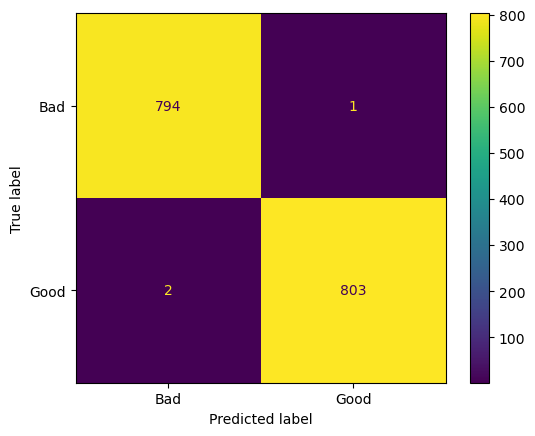

In [37]:
y_pred = svm_predict(X_val, X_train, y_train, alpha, rbf_sigma) 
plot_prediction(y_val, y_pred)

### 5. Testing

accuracy : 0.996
precision : 0.9970238095238095
recall : 0.995049504950495
f1 : 0.99603567888999
              precision    recall  f1-score   support

        -1.0       0.99      1.00      1.00       990
         1.0       1.00      1.00      1.00      1010

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



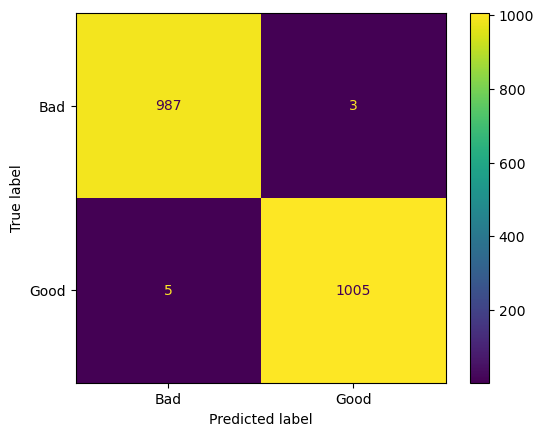

In [39]:
y_pred_svm = svm_predict(X_test, X_train, y_train, alpha, rbf_sigma)
acc_svm = f1_score(y_test, y_pred_svm)
plot_prediction(y_test, y_pred_svm)

## Model 2: Fully Connected

2 hidden layers and 1 output layer
- Layer 1: 16 units, activation function: Relu
- Layer 2: 32 units, activation function: Relu
- Layer 3: 2 units, activation function: Sigmoid

16 units in layer 1 and 32 units in layer 2.
Layer 3 is ouput layer

For the shape of the weight matrices and bias vectors:
- $\mathtt{W}^{[1]}: 16 \times 31$
- $\mathbf{b}^{[1]}: 16 \times 1$
- $\mathtt{W}^{[2]}: 32 \times 16$
- $\mathbf{b}^{[2]}: 32 \times 1$
- $\mathtt{W}^{[3]}: 2 \times 32$
- $\mathbf{b}^{[3]}: 2 \times 1$

### 1. Training

In [40]:
X = df.iloc[:,:-1]
Y = df.iloc[:,df.shape[1]-1]

X_TRAIN,X_test,y_train, y_test = train_test_split(X.to_numpy(),Y.to_numpy(), test_size= 0.2,random_state = 999)

X_TRAIN[:,:] = sc.fit_transform(X_TRAIN[:,:])
X_test[:,:] = sc.transform(X_test[:,:])

X_train,X_val,y_train, y_val = train_test_split(X_TRAIN,y_train, test_size= 0.2,random_state = 999)

In [20]:
digits=2 #number of classes

m = X_train.shape[0]

Y_train=np.eye(digits)[y_train.reshape(-1).astype('int32')]
Y_val=np.eye(digits)[y_val.reshape(-1).astype('int32')]
X_train,Y_train,X_val,Y_val=X_train.T,Y_train.T,X_val.T,Y_val.T

#Define Functions


def sigmoid(z):
    s = 1. / (1. + np.exp(-z))
    return s

def sigmoid_der(z):
    a = sigmoid(z)
    return a * (1 - a)

def relu(z):
    return np.where(z > 0, z, 0)

def relu_der(z):
    return np.where(z > 0, 1, 0)


def compute_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1./m) * L_sum

    return L

def feed_forward(X, W, b):
    L = len(W)
    a[0] = X
    for l in range(1, L+1):
        z[l] = W[l] @ a[l-1] + b[l]
        a[l] = g[l](z[l])
        if l==L:
            a[l]=np.exp(z[l]) / np.sum(np.exp(z[l]), axis=0)

def back_propagate(X, Y, W):
    L = len(W)
    dW = {}
    db = {}
    delta[L] = a[L] - Y
    for l in range(L, 0, -1):
        # Calculate gradient for weights
        dW[l] = (1/m_batch) * (delta[l] @ a[l-1].T)
        # Calculate gradient for biases
        db[l] = (1/m_batch) * np.sum(delta[l], axis = 1, keepdims=True)
        # Calculate previous layer's deltas
        if l > 1:
            delta[l-1]=np.multiply(np.dot(W[l].T,delta[l]),1-np.power(a[l-1],2))
            delta[l-1]= np.dot(W[l].T,delta[l]) * a[l-1] * (1-a[l-1])
            delta[l-1]= np.dot(W[l].T,delta[l]) * gprime[l-1](z[l-1])
    return dW, db



def update_weights(W, b, dW, db, alpha):
    L = len(W)
    for l in range(1, L+1):
        #W[l] = W[l] - alpha * dW[l]
        V_dW[l] = (beta * V_dW[l] + (1. - beta) * dW[l])
        W[l] = W[l] - alpha * V_dW[l]
        #b[l] = b[l] - alpha * db[l]
        V_db[l] = (beta * V_db[l] + (1. - beta) * db[l])
        b[l] = b[l] - alpha * V_db[l]

# hyperparameters
n_x = X_train.shape[0]
m = X_train.shape[1]
n_h1 = 16
n_h2 = 32

alpha = 0.01
beta = 0.9
batch_size = 32
batches = -(-m // batch_size)

# initialization
W={}
W[1] = np.random.normal(0, 0.1, (n_h1, n_x))
W[2] = np.random.normal(0, 0.1, (n_h2, n_h1))
W[3] = np.random.normal(0, 0.1, (digits, n_h2))

L = len(W)

b = {}
b[1] = np.zeros((n_h1, 1)) + 0.5
b[2] = np.zeros((n_h2, 1)) + 0.5
b[3] = np.zeros((digits, 1))



V_dW = {}
V_db = {}
for l in range(1, L+1):
    V_dW[l] = np.zeros(W[l].shape)
    V_db[l] = np.zeros(b[l].shape)

z = {}
a ={}
delta = {}

gprime = {}
gprime[1] = relu_der
gprime[2] = relu_der
gprime[3] = sigmoid_der

g = {}
g[1] = relu
g[2] = relu
g[3] = sigmoid

train_costs = []
test_costs = []

from tqdm import tqdm

# training

for i in range(200):
    permutation = np.random.permutation(X_train.shape[1])
    X_train_shuffled = X_train[:, permutation]
    Y_train_shuffled = Y_train[:, permutation]

    for j in range(batches):

        begin = j * batch_size
        end = min(begin + batch_size, X_train.shape[1] - 1)
        X = X_train_shuffled[:, begin:end]
        Y = Y_train_shuffled[:, begin:end]
        m_batch = end - begin

        feed_forward(X, W , b)
        dW, db = back_propagate(X, Y, W)

        update_weights(W, b, dW, db, alpha)


    feed_forward(X_train, W , b)
    train_cost = compute_loss(Y_train, a[L])
    train_costs.append(train_cost)
    feed_forward(X_val, W , b)
    test_cost = compute_loss(Y_val, a[L])
    test_costs.append(test_cost)
    print("Epoch {}: training cost = {}, test cost = {}".format(i+1 ,train_cost, test_cost))

print("Done.")

Epoch 1: training cost = 0.05575020149582304, test cost = 0.05632548000155871
Epoch 2: training cost = 0.036747884308300026, test cost = 0.0366867277315331
Epoch 3: training cost = 0.02311823411556157, test cost = 0.022842665899369126
Epoch 4: training cost = 0.015704566080462168, test cost = 0.015547335431544566
Epoch 5: training cost = 0.010949547676000702, test cost = 0.010888283923546774
Epoch 6: training cost = 0.00769129765963439, test cost = 0.008014579630492326
Epoch 7: training cost = 0.006034762427527411, test cost = 0.006133459999177245
Epoch 8: training cost = 0.005025625925918064, test cost = 0.0056091818266036245
Epoch 9: training cost = 0.019298676981532807, test cost = 0.017927524578722213
Epoch 10: training cost = 0.004283807026723657, test cost = 0.004699713002591348
Epoch 11: training cost = 0.003964516523536324, test cost = 0.0039431412084988
Epoch 12: training cost = 0.005161408041783798, test cost = 0.00844210368956329
Epoch 13: training cost = 0.00318965238702856

/var/folders/gq/3rtsgkd97h7djl6gyntg3f3r0000gn/T/ipykernel_44257/825121504.py:29: RuntimeWarning: divide by zero encountered in log
  L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
/var/folders/gq/3rtsgkd97h7djl6gyntg3f3r0000gn/T/ipykernel_44257/825121504.py:29: RuntimeWarning: invalid value encountered in multiply
  L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))


Epoch 132: training cost = nan, test cost = 0.0034745948955934606
Epoch 133: training cost = 0.00025258501181016314, test cost = 0.0011451247666318806
Epoch 134: training cost = 0.00019957731247124822, test cost = 0.0006692478247742938
Epoch 135: training cost = 0.0002348006605948823, test cost = 0.001104351170009866
Epoch 136: training cost = 0.0005374763466894795, test cost = 0.0016368237745279324
Epoch 137: training cost = 0.00024121512707396648, test cost = 0.0011882846203167567
Epoch 138: training cost = 0.0001705915702186312, test cost = 0.0010709167116233894
Epoch 139: training cost = 0.00016548894479287345, test cost = 0.0011230806925302205
Epoch 140: training cost = 0.00016294641238272727, test cost = 0.0011237879912637475
Epoch 141: training cost = 0.00017606148411838224, test cost = 0.0012320631817986992
Epoch 142: training cost = 0.0002417422006334901, test cost = 0.0015701200477192705
Epoch 143: training cost = 0.00023650211006544686, test cost = 0.0010777302537062273
Epoc

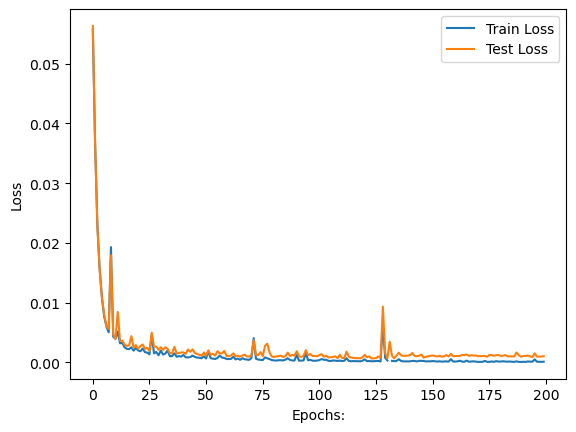

In [21]:
plt.plot(train_costs,label='Train Loss')
plt.plot(test_costs,label='Test Loss')
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.legend()
plt.show()

### 2. Validation

In [22]:
def predict(X, W, b):
    feed_forward(X,  W, b)
    predictions = np.argmax(a[L], axis=0)
    return predictions
def accuracy(X,Y, W, b):
    feed_forward(X,  W, b)
    predictions = np.argmax(a[L], axis=0)
    labels = np.argmax(Y, axis=0)
    return (predictions==labels).mean()
print('Training accuracy: ', accuracy(X_train,Y_train, W, b))
print('Validation accuracy: ',accuracy(X_val,Y_val, W, b))

Training accuracy:  0.9999728906374428
Validation accuracy:  0.9998509000216873


accuracy : 0.9998509000216873
precision : 0.9998933333333333
recall : 0.9999390448325257
f1 : 0.9999161885605004
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8154
           1       1.00      1.00      1.00     65622

    accuracy                           1.00     73776
   macro avg       1.00      1.00      1.00     73776
weighted avg       1.00      1.00      1.00     73776



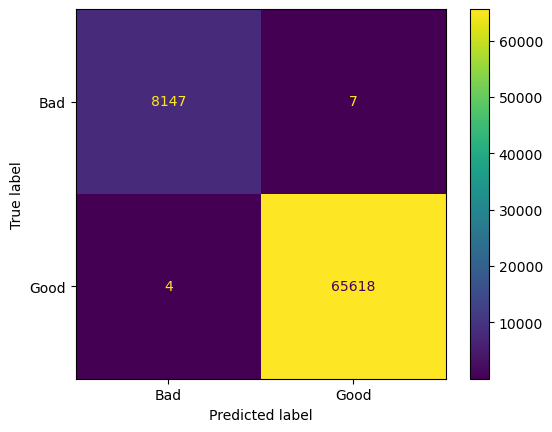

In [23]:
y_pred = predict(X_val, W, b)
plot_prediction(np.argmax(Y_val, axis=0), y_pred)

## 3. Testing

accuracy : 0.9998698763825634
precision : 0.999902681134738
recall : 0.9999513381995134
f1 : 0.9999270090752049
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10020
           1       1.00      1.00      1.00     82200

    accuracy                           1.00     92220
   macro avg       1.00      1.00      1.00     92220
weighted avg       1.00      1.00      1.00     92220



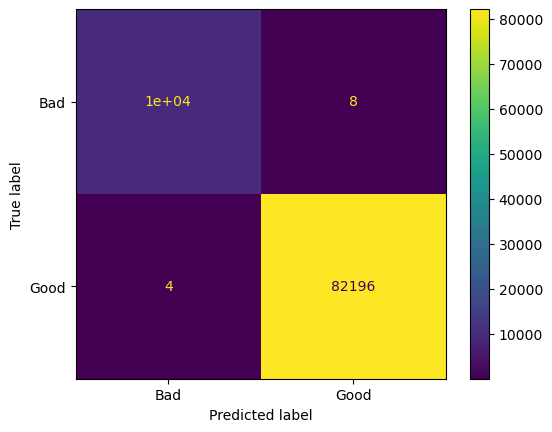

In [24]:
Y_test=np.eye(digits)[y_test.reshape(-1).astype('int32')]

X_test,Y_test = X_test.T,Y_test.T
y_pred_fc = predict(X_test, W, b)
acc_fc = f1_score(y_test, y_pred_fc)
plot_prediction(y_test, y_pred_fc)

## Model 3 : CNN

In [43]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

X_TRAIN,X_test,y_train, y_test = train_test_split(X.to_numpy(),Y.to_numpy(), test_size= 0.2,random_state = 999)

mx = MinMaxScaler()
X_TRAIN[:,:] = sc.fit_transform(X_TRAIN[:,:])
X_test[:,:] = sc.transform(X_test[:,:])

X_TRAIN = X_TRAIN.reshape(X_TRAIN.shape[0], X_TRAIN.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1) 

X_train,X_val,y_train, y_val = train_test_split(X_TRAIN,y_train, test_size= 0.2,random_state = 999)

### 1. Training

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

cnn = Sequential()
cnn.add(Conv1D(64, 2, activation='relu', input_shape=(31,1)))
cnn.add(Dropout(0.1))

cnn.add(Conv1D(128, 2, activation='relu'))
cnn.add(Dropout(0.2))


cnn.add(Flatten())
cnn.add(Dropout(0.4))
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.6))

cnn.add(Dense(1, activation='sigmoid'))

cnn.summary()

cnn.compile(optimizer='SGD', loss='binary_crossentropy', metrics = ['accuracy'])

epochs = 20
batch_size = 10
history = cnn.fit(X_train , y_train , verbose=1 , batch_size=batch_size , epochs=epochs ,validation_data=(X_val, y_val) )

2023-01-11 22:24:02.787439: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-11 22:24:13.237355: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 64)            192       
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 29, 128)           16512     
                                                                 
 dropout_1 (Dropout)         (None, 29, 128)           0         
                                                                 
 flatten (Flatten)           (None, 3712)              0         
                                                                 
 dropout_2 (Dropout)         (None, 3712)              0         
                                                                 
 dense (Dense)               (None, 256)               9

### 2. Validation

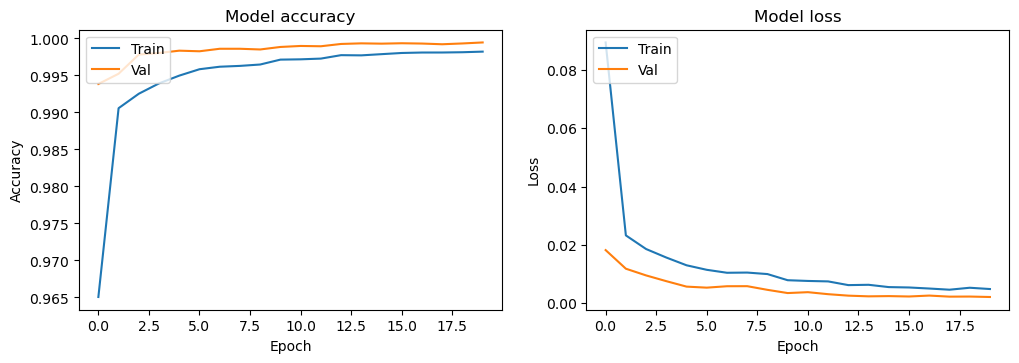

In [27]:
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.savefig("acc.png")


plt.subplot(2, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.savefig("loss.png")
plt.show()


2306/2306 [==============================] - 6s 2ms/step
accuracy : 0.999457818260681
precision : 0.9994973190348525
recall : 0.9998933284569199
f1 : 0.9996952845280719
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8154
           1       1.00      1.00      1.00     65622

    accuracy                           1.00     73776
   macro avg       1.00      1.00      1.00     73776
weighted avg       1.00      1.00      1.00     73776



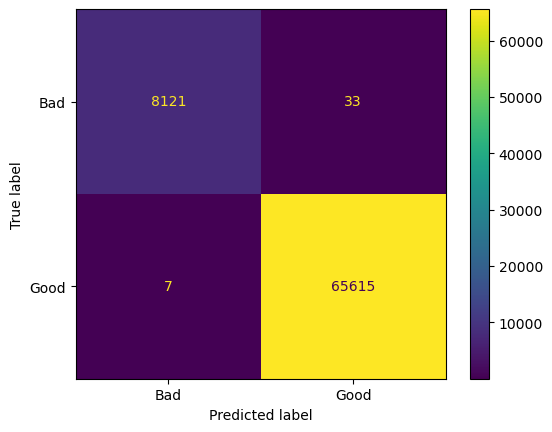

In [44]:
from sklearn.metrics import confusion_matrix

y_pred = (cnn.predict(X_val) > 0.5).astype("int32")
plot_prediction(y_val, y_pred)

### 3. Testing

2882/2882 [==============================] - 6s 2ms/step
accuracy : 0.9993385382780308
precision : 0.9993920159535014
recall : 0.9998661800486618
f1 : 0.9996290417723289
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10020
           1       1.00      1.00      1.00     82200

    accuracy                           1.00     92220
   macro avg       1.00      1.00      1.00     92220
weighted avg       1.00      1.00      1.00     92220



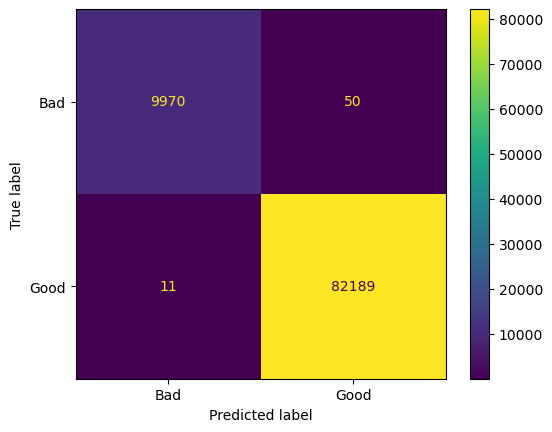

In [45]:
from sklearn.metrics import confusion_matrix

y_pred_cnn = (cnn.predict(X_test) > 0.5).astype("int32")
acc_cnn = f1_score(y_test, y_pred_cnn)
plot_prediction(y_test, y_pred_cnn)

# 3. Testing and Conclusion

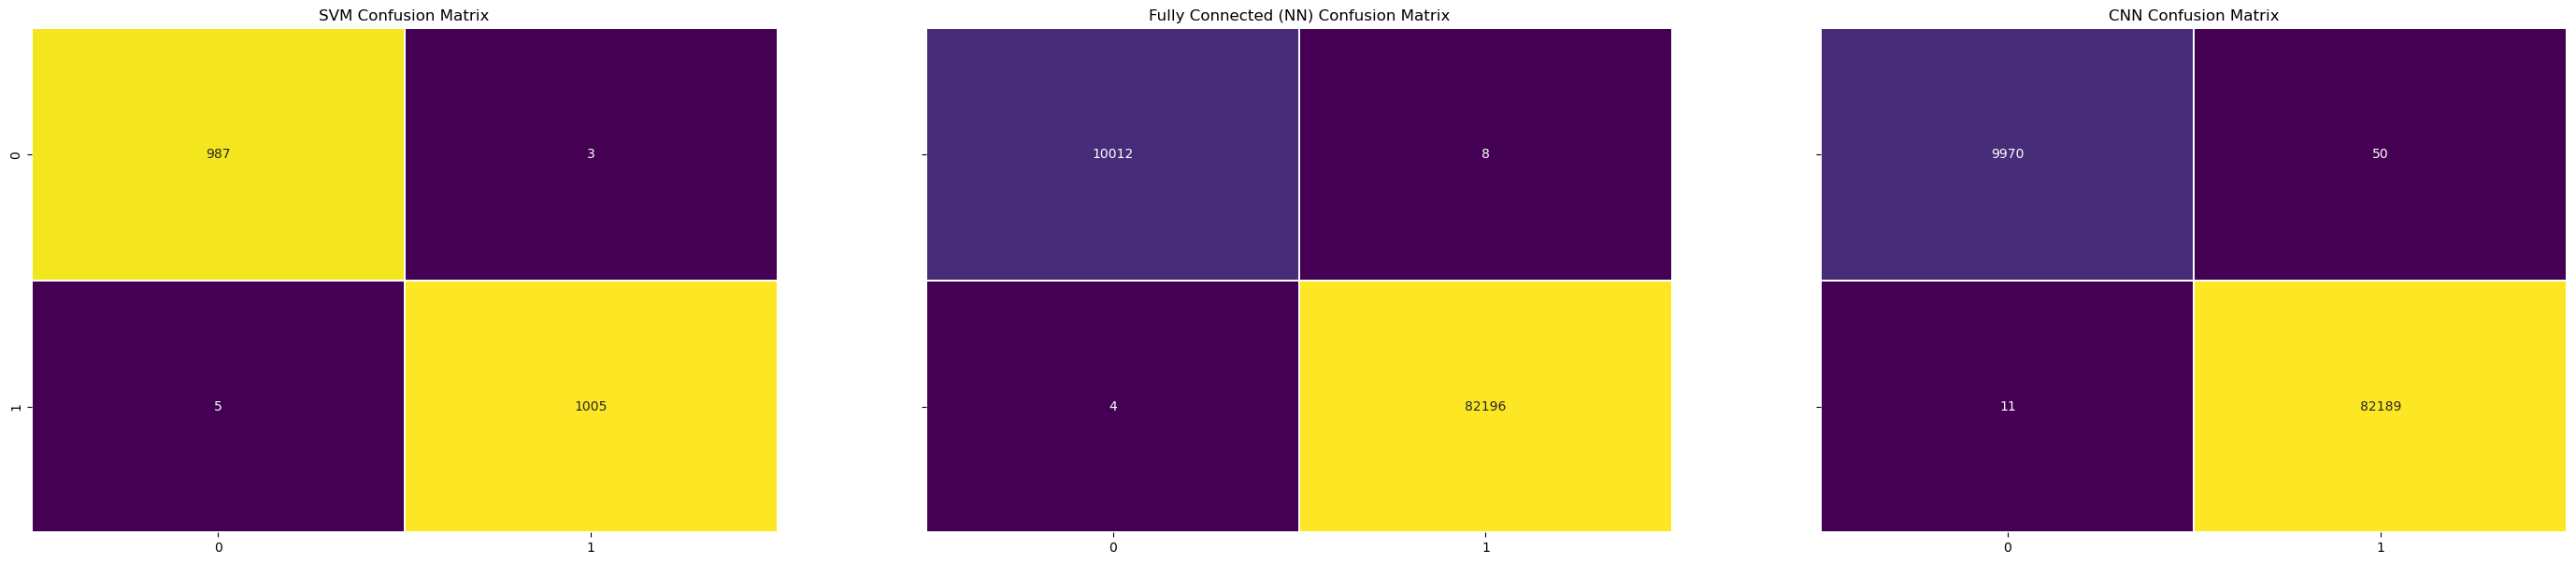

In [46]:
from sklearn.metrics import confusion_matrix

#y_pred_svm = svm.predict(X)
#y_pred_rf = rf.predict(X)
#y_pred_cnn = cnn.predict_classes(x)

f, (axes1, axes2, axes3) = plt.subplots(1,3,sharey=True)
f.set_figheight(7)
f.set_figwidth(35)
sns.heatmap(confusion_matrix(y_test_svm, y_pred_svm), annot=True, linewidths=.3, fmt= 'd',ax=axes1, cmap='viridis', cbar=False)
axes1.title.set_text('SVM Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_fc), annot=True, linewidths=.3, fmt= 'd',ax=axes2, cmap='viridis', cbar=False)
axes2.title.set_text('Fully Connected (NN) Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_cnn), annot=True, linewidths=.3, fmt= 'd',ax=axes3, cmap='viridis', cbar=False)
axes3.title.set_text('CNN Confusion Matrix')
plt.savefig("cm_all.png")
plt.show()

,Models,Accuracy
0,SVM,99.603568
1,FC,99.992701
2,CNN,99.962904


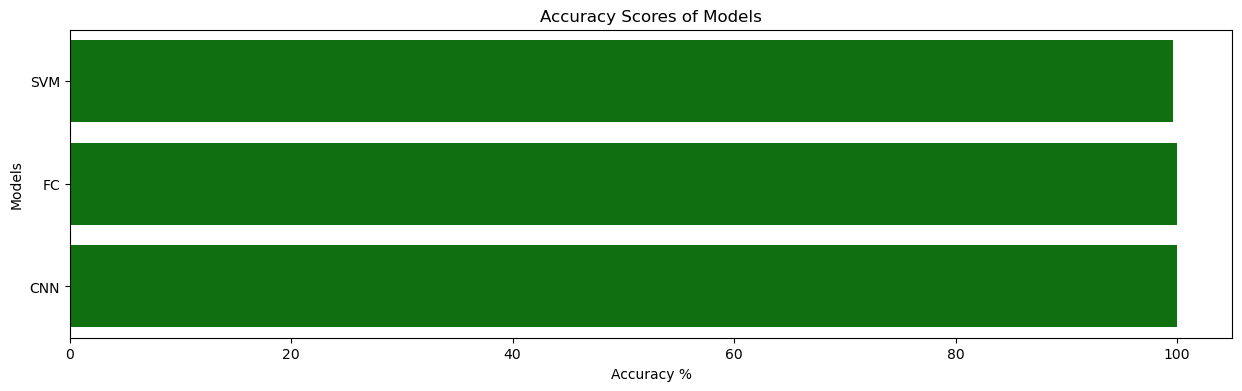

In [51]:
models = ['SVM', 'FC', 'CNN']
accuracy = [acc_svm*100, acc_fc*100, acc_cnn*100]
results = pd.DataFrame({'Models': models, 'Accuracy': accuracy})
plt.figure(figsize=(15,4))
sns.barplot(x='Accuracy', y='Models', data=results, color = 'green')
plt.xlabel('Accuracy %')
plt.title('Accuracy Scores of Models');
results